# Graph III

In [12]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph

In [13]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [14]:
def first_node(state: AgentState):
    """This is the first node of our sequence."""
    
    state["final"] = f"Hi {state["name"]}!"
    return state

def second_node(state: AgentState):
    """This is the second node of our sequence."""
    
    state["final"] = state["final"] + f" You are {state["age"]} years old!"
    
    return state
    

In [15]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")
app = graph.compile()



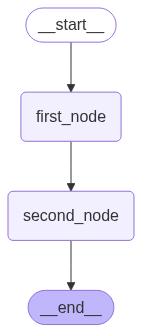

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"name": "Charlie", "age": 20})
print(result)

{'name': 'Charlie', 'age': 20, 'final': 'Hi Charlie! You are 20 years old!'}


# Exercise for Graph III

## Your task:

1. Accept a user's name, age, and a list of their skills.
2. Pass the state through three nodes that:
    - **First node:** Personalizes the name field with a greeting.
    - **Second node:** Describe's the user's age.
    - **Third node:** Lists the user's skills in a formatted string.
3. The final output in the result field should be a **combined message** in this format:

**Output**: "Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph"

Hint: You will need to use the add_edge method twice.



In [60]:
class AgentState2(TypedDict):
    name: str
    age: str
    skill: str
    final: str
    
def first_node2(state: AgentState2):
    
    state["final"] = f"{state["name"]}, welcome to the system!"
    return state
    
def second_node2(state: AgentState2):
    
    state["final"] = state["final"] + f" You are {state["age"]} years old!"
    return state

def third_node2(state: AgentState2):
    
    state["final"] = state["final"] + f" You have skills in: {", ".join(state["skill"])}"
    return state

In [61]:
graph2 = StateGraph(AgentState2)

graph2.add_node("first_node2", first_node2)
graph2.add_node("second_node2", second_node2)
graph2.add_node("third_node2", third_node2)

graph2.set_entry_point("first_node2")
graph2.add_edge("first_node2","second_node2")
graph2.add_edge("second_node2","third_node2")
graph2.set_finish_point("third_node2")

app2 = graph2.compile()


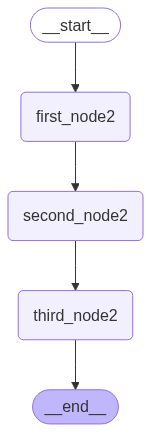

In [62]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [63]:
result = app2.invoke({"name": "Linda", "age": 31, "skill": ["Python", "Machine Learning", "LangGraph"]})
result["final"]

'Linda, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'